# Final Project NLP Course

### Project no. 3

### Step 1: download the data frop scopus
In this project i gonna

First we need to install the tweetpy

In [ ]:
import requests
import csv
from datetime import datetime
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.models import Word2Vec
nltk.download('stopwords')
nltk.download('punkt')



'''
1. Downloading the data from the Scopus site.
    For every articlw we will download the following information:
    'Title', 'Authors', 'Publication', 'keywords', 'Cover Date',  and'Abstract'.
    The data will be saved on CSV file that we will use in the progream later.
'''

# Using API key to access the data on the website
api_key = 'fd9541b6acd5d7192d675d5534ec6f31'

# Setting current year
current_year = datetime.now().year

# Base URL for SCOPUS API
base_url = 'https://api.elsevier.com/content/search/scopus'

# Function to fetch data
def fetch_data(start_year, api_key, page=0):
    # Set up query parameters
    params = {
        'query': f'TITLE-ABS-KEY(NLP) AND PUBYEAR AFT {start_year} AND PUBYEAR BEF {current_year}',
        'apiKey': api_key,
        'count': '25',
        'field': 'title,author,publicationName,prism:doi,authkeywords,prism:coverDate,dc:description',
        'start': page * 25  # Update the start index for pagination
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to retrieve data:", response.status_code)
        return None

# Write data to CSV
with open('scopus_data_last_10_years.csv', 'w', newline='', encoding='utf-8') as file:
    print("Downloading data, please wait")
    writer = csv.writer(file)
    writer.writerow(['Title', 'Authors', 'Publication', 'Keywords', 'Cover Date', 'Description'])

    # Iterate over 10 years of publications
    for year in range(current_year - 10, current_year + 1):
        page = 0
        while True:
            data = fetch_data(year, api_key, page)
            if data and data.get('search-results', {}).get('entry'):
                articles = data['search-results']['entry']
                for item in articles:
                    writer.writerow([
                        item.get('dc:title', ''),
                        item.get('dc:creator', ''),
                        item.get('prism:publicationName', ''),
                        item.get('prism:volume', ''),
                        item.get('prism:issueIdentifier', ''),
                        item.get('prism:pageRange', ''),
                        item.get('prism:coverDate', ''),
                        item.get('prism:doi', ''),
                        item.get('dc:description', '')
                    ])
                page += 1
            else:
                break

print("Data successfully saved to 'scopus_data_last_10_years.csv'")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Failed to retrieve data: 400
Failed to retrieve data: 400
Failed to retrieve data: 400
Failed to retrieve data: 400
Failed to retrieve data: 400
Failed to retrieve data: 400
Failed to retrieve data: 400
Failed to retrieve data: 400
Failed to retrieve data: 400
Failed to retrieve data: 400
Failed to retrieve data: 400
Data successfully saved to 'scopus_data_last_10_years.csv'


In [ ]:
from datetime import datetime
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.models import Word2Vec
nltk.download('stopwords')
nltk.download('punkt')

# uploading the data file we from SCOPUS website.
print("Uploading the file data 'scopus.csv' ")

# Sample data loading
df = pd.read_csv('scopus.csv')

# Combine columns
df['combined'] = df[['Author full names', 'Title', 'Year', 'Abstract', 'Author Keywords', 'Publisher']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
# Convert the combined column to a single string
text_scopus = ' '.join(df['combined'].astype(str).tolist())

'''
2. Pre-processing the data.
    Before we will analyze the data, it need to be tokenize, lemmatize, and stop words removal.
'''
# Word tokenizer
word_tokens = word_tokenize(text_scopus)

# Stemming
stemmer = PorterStemmer()
stemmed_word_tokens = [stemmer.stem(token) for token in word_tokens]

# Lemmatization
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
lemmatized_word_tokens = [lemmatizer.lemmatize(token) for token in stemmed_word_tokens]


#Removing stop words from word tokeneztion
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in lemmatized_word_tokens if token.lower() not in stop_words]

# Print the first 20 strings ater pre-proccessing
for word in filtered_tokens[:20]:
    print(word)

# Join the proccesed tokens into text.
preprocessed_text = ' '.join(filtered_tokens)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Uploading the file data 'scopus.csv' 


[nltk_data] Downloading package wordnet to /root/nltk_data...


mcelroy
,
eoin
(
56079814100
)
;
wood
,
thoma
(
58170495400
)
;
bond
,
raymond
(
36019802200
)


3. Finding common words using TF-IDF
Displatying the results in bar chart and word cloud.

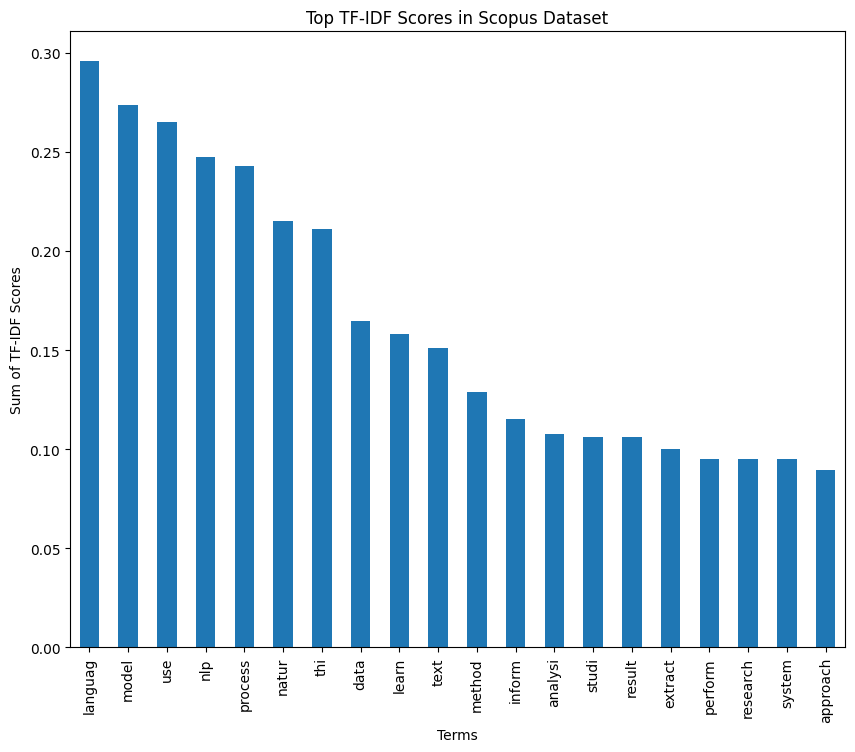

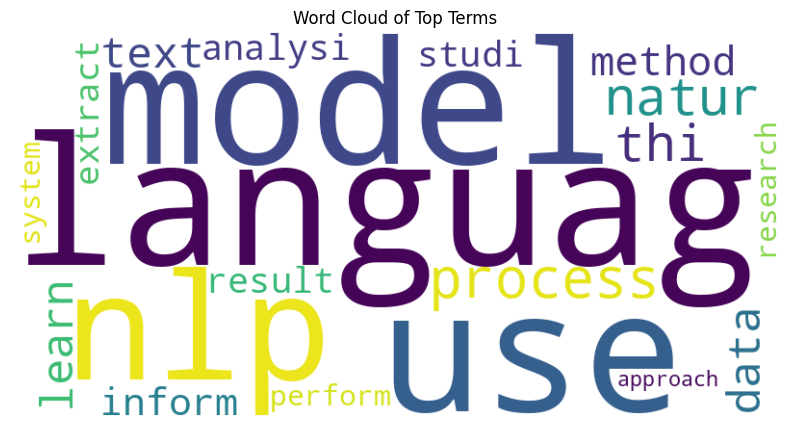

In [ ]:
vectorizer = TfidfVectorizer()
# Fit and transform the text
tfidf_matrix = vectorizer.fit_transform([preprocessed_text])

# Get feature names to use as dataframe column headers
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Sum of TF-IDF scores for each term and select top 20
tfidf_sum = tfidf_df.sum().sort_values(ascending=False).head(20)

# Plotting the bar chart
plt.figure(figsize=(10, 8))
tfidf_sum.plot(kind='bar')
plt.title('Top TF-IDF Scores in Scopus Dataset')
plt.xlabel('Terms')
plt.ylabel('Sum of TF-IDF Scores')
plt.show()
print()
print()
# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_sum)


# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Top Terms')
plt.show()


4. Finding common word using Word2Vec

In [ ]:
import re
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
from collections import Counter

#remove all the punctuation marks
preprocessed_text = re.sub(r'[^\w\s]', '', preprocessed_text)  # Remove all punctuation

# Tokenize the new data
sentences = sent_tokenize(preprocessed_text)

# Tokenize the text into sentences, then filtered words
tokenized_sentences= [word_tokenize(sentence) for sentence in sentences]

# Train Word2Vec model
word2vec_model = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Flatten the list of lists into a single list of words
all_words = [word for sentence in tokenized_sentences for word in sentence]

# Count the frequency of each word
word_freq = Counter(all_words)

# Display the most common words
most_common_words = word_freq.most_common(20)  # Change 10 to however many you want to see
print("Most common words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

# Get word embeddings for all words
word_embeddings = np.array([word2vec_model.wv[word] for word in all_words])

print("Shape of word embeddings:", word_embeddings.shape)

Most common words:
languag: 20980
model: 19338
use: 18884
process: 16951
nlp: 16530
natur: 15342
thi: 15044
data: 11365
learn: 10912
text: 9698
method: 9125
inform: 8188
analysi: 7648
result: 7570
studi: 7556
extract: 7087
research: 6764
system: 6721
perform: 6665
propos: 6341
Shape of word embeddings: (1604353, 100)


5. Finding common word using Autoencoder

In [ ]:
import torch
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),  # Compress to 64 dimensions
            nn.ReLU(),
            nn.Linear(64, latent_dim)  # Further compress to latent_dim dimensions
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            nn.Sigmoid()  # Sigmoid activation for reconstruction
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

input_dim = 100  # Since Word2Vec embeddings are 100-dimensional
latent_dim = 10  # You can adjust this based on the desired level of compression
model = Autoencoder(input_dim, latent_dim)

In [ ]:
X = torch.tensor(word_embeddings, dtype=torch.float32)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(50):  # Adjust the number of epochs as needed
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, X)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')

Epoch [1/100], Loss: 0.2473
Epoch [2/100], Loss: 0.2328
Epoch [3/100], Loss: 0.2168
Epoch [4/100], Loss: 0.1980
Epoch [5/100], Loss: 0.1754
Epoch [6/100], Loss: 0.1485
Epoch [7/100], Loss: 0.1178
Epoch [8/100], Loss: 0.0850
Epoch [9/100], Loss: 0.0535
Epoch [10/100], Loss: 0.0279
Epoch [11/100], Loss: 0.0115
Epoch [12/100], Loss: 0.0037
Epoch [13/100], Loss: 0.0010
Epoch [14/100], Loss: 0.0002
Epoch [15/100], Loss: 0.0001
Epoch [16/100], Loss: 0.0000
Epoch [17/100], Loss: 0.0000
Epoch [18/100], Loss: 0.0000
Epoch [19/100], Loss: 0.0000
Epoch [20/100], Loss: 0.0000
Epoch [21/100], Loss: 0.0000
Epoch [22/100], Loss: 0.0000
Epoch [23/100], Loss: 0.0000
Epoch [24/100], Loss: 0.0000
Epoch [25/100], Loss: 0.0000
Epoch [26/100], Loss: 0.0000
Epoch [27/100], Loss: 0.0000
Epoch [28/100], Loss: 0.0000
Epoch [29/100], Loss: 0.0000
Epoch [30/100], Loss: 0.0000
Epoch [31/100], Loss: 0.0000
Epoch [32/100], Loss: 0.0000
Epoch [33/100], Loss: 0.0000
Epoch [34/100], Loss: 0.0000
Epoch [35/100], Loss: 0

In [ ]:
with torch.no_grad():
    encoded_words = model.encoder(X)
    avg_activations = encoded_words.mean(dim=0)

# Sort words by their average activation
common_words_idx = avg_activations.argsort(descending=True)
common_words = [all_words[i] for i in common_words_idx[:20]]  # Get the top 20 most common words

print("Common words based on latent space activations:")
for word in common_words:
    print(word)

Common words based on latent space activations:
56079814100
thoma
wood
58170495400
raymond
eoin
mcelroy
36019802200
bond
mulvenna


###6. Comparision of common words finding results

**TF-IDF**: The most common word is "language". The method can ignore punctuation marks and focus only on words. Additionally, it runs relatively faster compared to the Word2vec and Autoencoder.

**Word2vec**: The method does not ignore puctuation so i had to rmove them from the text. After that the result is very similar to the othe two methods. Unrotiunatly, this methos works much more slower than the TF-IDF.

**Autoencoder**: The rsult is not similar to the other methods. In addition it is clear that the result ia not right. A number cannot be the most common word because it is a unic number. I assume the model is not a very good choise in detecting common words.



###7. Named Entity Recognition (NER)

First we need to install spacy and dowenload the english module.

In [ ]:
import spacy
import pandas as pd
from nltk.tokenize import sent_tokenize

# Load the spaCy model for English
nlp = spacy.load('en_core_web_sm')

# Define a function to split text into smaller chunks
def split_text_into_chunks(text, max_length=1000000):
    return [text[i:i + max_length] for i in range(0, len(text), max_length)]

# Split the preprocessed text into smaller chunks
text_chunks = split_text_into_chunks(preprocessed_text)

# Create an empty DataFrame to store the named entities
entities_df = pd.DataFrame(columns=['Text', 'Label'])

# Process each chunk separately
for i, chunk in enumerate(text_chunks):
    doc = nlp(chunk)

       # Extract named entities and store them in a temporary DataFrame
    temp_df = pd.DataFrame([(ent.text, ent.label_) for ent in doc.ents], columns=['Text', 'Label'])

    # Concatenate the temporary DataFrame with the main DataFrame
    entities_df = pd.concat([entities_df, temp_df], ignore_index=True)

# Display the DataFrame
print("Named Entities:")
print(entities_df.head(20))  # Display the first few rows

Named Entities:
                          Text     Label
0                  58170495400  CARDINAL
1        raymond ( 36019802200    PERSON
2                   6507434648      DATE
3                      shevlin       GPE
4                  14020124700      DATE
5              mauricio scopel    PERSON
6                  55929337800  CARDINAL
7                  57190761807      DATE
8                  valid studi    PERSON
9                         2024  CARDINAL
10  sourc advanc mental health       ORG
11           heterogen variabl       ORG
12                      measur       GPE
13                    challeng    PERSON
14                         741  CARDINAL
15                        five  CARDINAL
16                       2,058  CARDINAL
17                 rank correl    PERSON
18                         .48       GPE
19                    p < .001       ORG


###8.  Exploratory Data Analysis (EDA)

Step 1: Load the Data and Basic Overview

In [ ]:
# import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('scopus.csv')

# Display the first few rows of the dataset
print(df.head())

# Check the shape of the dataset
print(f"Shape of the dataset: {df.shape}")

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Get basic information about the dataset
print("Data types and non-null values:")
print(df.info())

                                   Author full names  \
0  McElroy, Eoin (56079814100); Wood, Thomas (581...   
1  Huang, Ting-Yun (56580824900); Chong, Chee-Fah...   
2  Stallings, L. (59228737000); Bhat, P. (5922873...   
3  Ohse, Julia (58994803300); Hadžić, Bakir (5862...   
4  Bartal, Alon (35088013100); Jagodnik, Kathleen...   

                                               Title  Year  \
0  Using natural language processing to facilitat...  2024   
1  A pre-trained language model for emergency dep...  2024   
2  How artificial intelligence can enable data cl...  2024   
3  Zero-Shot Strike: Testing the generalisation c...  2024   
4  AI and narrative embeddings detect PTSD follow...  2024   

                                            Abstract  \
0  Background: Pooling data from different source...   
1  Introduction: The urgency and complexity of em...   
2  Determining the size of the addressable market...   
3  Depression is a significant global health chal...   
4  Free-te

Step 2: Descriptive Statistics

Descriptive statistics for numerical columns:
              Year
count  8443.000000
mean   2021.241976
std       2.643616
min    2013.000000
25%    2020.000000
50%    2022.000000
75%    2023.000000
max    2024.000000
Distribution of publication years:
Year
2013     123
2014     152
2015     199
2016     180
2017     211
2018     310
2019     625
2020     702
2021    1057
2022    1445
2023    1851
2024    1588
Name: count, dtype: int64


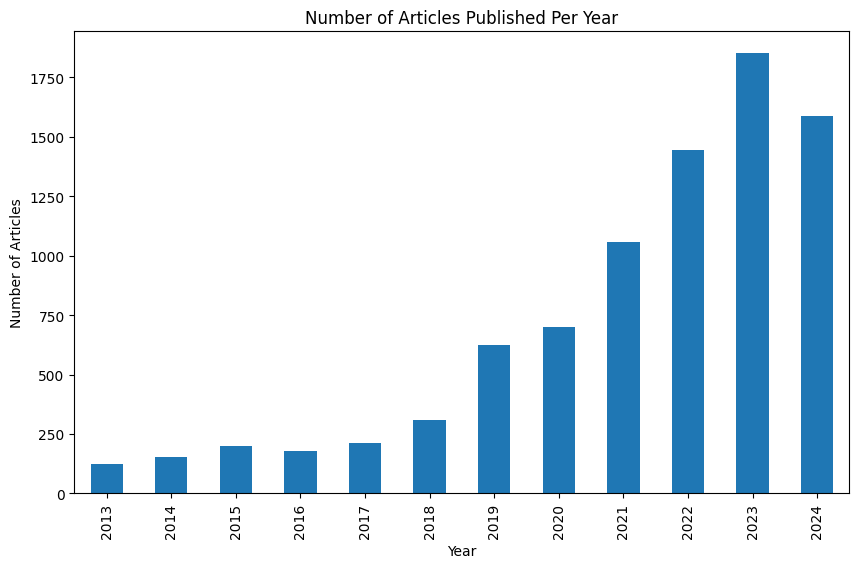

In [ ]:
import matplotlib.pyplot as plt

# Summary statistics for numerical columns
print("Descriptive statistics for numerical columns:")
print(df.describe())

# Distribution of publication years
print("Distribution of publication years:")
print(df['Year'].value_counts().sort_index())

# Bar plot for articles per year
df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Number of Articles Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()


### 9. Text Data Exploration

- Top Keywords:

Most common keywords:
[('Natural language processing', 1585), ('natural language processing', 1119), ('NLP', 895), ('Machine learning', 537), ('machine learning', 450), ('Deep learning', 434), ('deep learning', 338), ('Sentiment analysis', 302), ('Natural language processing (NLP)', 277), ('natural language processing (NLP)', 272)]


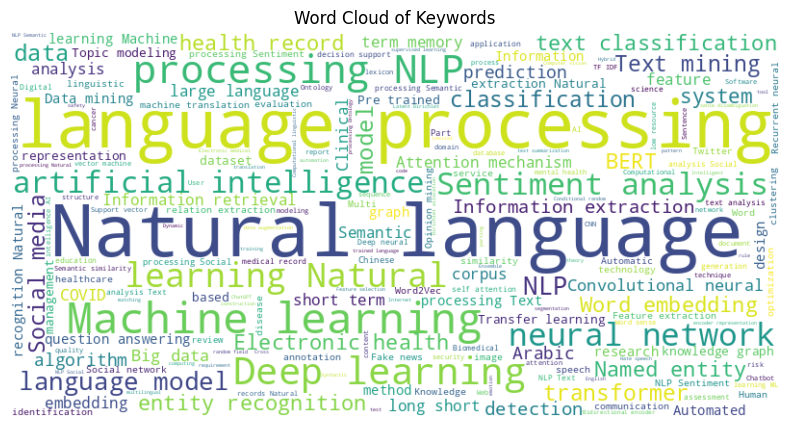

In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Assuming 'Author Keywords' is a column with keywords separated by semicolons or commas
keywords_series = df['Author Keywords'].dropna().apply(lambda x: x.split(';') if ';' in x else x.split(','))
all_keywords = [keyword.strip() for sublist in keywords_series for keyword in sublist]

# Count the most common keywords
keyword_counts = Counter(all_keywords)
print("Most common keywords:")
print(keyword_counts.most_common(10))

# Generate a word cloud for keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_keywords))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()

- Most Frequent Journals:

In [ ]:
print("Most frequent publishers:")
print(df['Publisher'].value_counts().head(20))

Most frequent publishers:
Publisher
Institute of Electrical and Electronics Engineers Inc.    669
Elsevier Ltd                                              482
Elsevier B.V.                                             436
Springer                                                  388
MDPI                                                      339
JMIR Publications Inc.                                    228
Multidisciplinary Digital Publishing Institute (MDPI)     224
Springer Science and Business Media Deutschland GmbH      211
Oxford University Press                                   177
BioMed Central Ltd                                        165
Association for Computing Machinery                       162
John Wiley and Sons Inc                                   148
Academic Press Inc.                                       147
MDPI AG                                                   142
Science and Information Organization                      126
Elsevier Inc.                     


Showing statistics about subjuects and finding depended subjects.


In [ ]:
import pandas as pd

# Load the data from your CSV file
df = pd.read_csv('scopus.csv')

# Convert 'Year' column to integer if it's not already
df['Year'] = df['Year'].astype(int)

# Filter the data to only include articles from the last 10 years
current_year = pd.to_datetime('now').year
df_last_10_years = df[df['Year'] >= (current_year - 10)]

print(f"Number of articles from the last 10 years: {df_last_10_years.shape[0]}")

Number of articles from the last 10 years: 8320


Top 10 most frequent words/phrases:
nlp: 14728
language: 12614
data: 10140
model: 9074
based: 8848
processing: 8656
natural: 8450
natural language: 8145
language processing: 7430
text: 7292


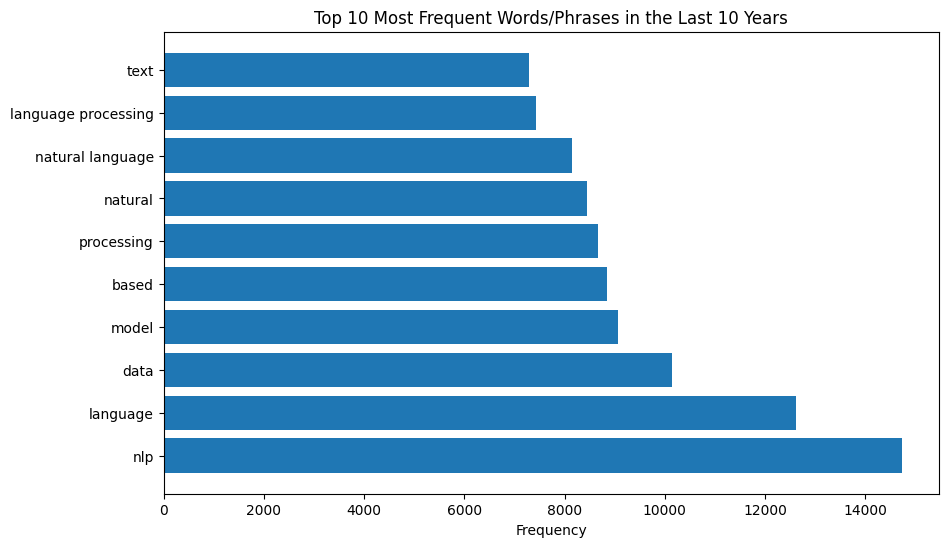

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt

# Combine relevant text columns (e.g., Title, Abstract)
text_data = df_last_10_years['Abstract'].dropna().tolist()

# Initialize the vectorizer to count word frequencies
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))  # Adjust ngram_range for phrases
X = vectorizer.fit_transform(text_data)

# Get the word/phrase frequencies
word_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0))))

# Display the top 10 most frequent words/phrases
most_common_words = word_counts.most_common(10)
print("Top 10 most frequent words/phrases:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Optional: Plot the top 10
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.barh(words, counts)
plt.xlabel('Frequency')
plt.title('Top 10 Most Frequent Words/Phrases in the Last 10 Years')
plt.show()

### 10. summarization of every abstract in the data.

In [ ]:
import pandas as pd

# Load the data from your CSV file
df = pd.read_csv('scopus.csv')

# Extract the 'Abstract' column
abstracts = df['Abstract'].dropna().tolist()

print(f"Number of abstracts: {len(abstracts)}")
print("Sample abstract:")
print(abstracts[0])

from transformers import pipeline

# Initialize the summarization pipeline using a pre-trained model
summarizer = pipeline("summarization", model="t5-small")

#temporery list for saving the summerization results
summaries = []

# Function to summarize text
def summarize_text(text, max_length=150, min_length=30, do_sample=False):
    summary = summarizer(text, max_length=max_length, min_length=min_length, do_sample=do_sample)
    return summary[0]['summary_text']

for abstract in abstracts[:10]:  # took the first 10 because it takes too long in run time
    summary = summarize_text(abstract)
    summaries.append(summary)
    print("Abstract: "+ abstract)
    print("Summery: "+ summary)
    print("-" * 80)


Number of abstracts: 8443
Sample abstract:
Background: Pooling data from different sources will advance mental health research by providing larger sample sizes and allowing cross-study comparisons; however, the heterogeneity in how variables are measured across studies poses a challenge to this process. Methods: This study explored the potential of using natural language processing (NLP) to harmonise different mental health questionnaires by matching individual questions based on their semantic content. Using the Sentence-BERT model, we calculated the semantic similarity (cosine index) between 741 pairs of questions from five questionnaires. Drawing on data from a representative UK sample of adults (N = 2,058), we calculated a Spearman rank correlation for each of the same pairs of items, and then estimated the correlation between the cosine values and Spearman coefficients. We also used network analysis to explore the model’s ability to uncover structures within the data and metadata.

Token indices sequence length is longer than the specified maximum sequence length for this model (531 > 512). Running this sequence through the model will result in indexing errors


Abstract: We present an Natural Language Processing based analysis on the phenomenon of “Meme Stocks”, which has emerged as a result of the proliferation of neo-brokers like Robinhood and the massive increase in the number of small-scale stock investors. Such investors often use specific Social Media channels to share short-term investment decisions and strategies, resulting in partial collusion and planning of investment decisions. The impact of online communities on the stock prices of affected companies has been considerable in the short term. This paper has two objectives. Firstly, we chronologically model the discourse on the most prominent platforms. Secondly, we examine the potential for using collaboratively made investment decisions as a means to assist in the selection of potential investments. To understand the investment decision-making processes of small-scale investors, we analyze data from Social Media platforms like Reddit, Stocktwits and Seeking Alpha. Our methodology 


### 11. Implement a GPT model to analyze and answer questions about the dataset.



In [ ]:
# Installing missing models
!pip install transformers datasets
!pip install transformers[torch] accelerate -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
import pandas as pd
from transformers import pipeline, GPT2LMHeadModel, GPT2Tokenizer

# Load your data from the CSV file
df = pd.read_csv('scopus.csv')

# Combine relevant columns into a single text string (optional)
df['combined'] = df[['Author full names', 'Title', 'Year', 'Abstract', 'Author Keywords', 'Publisher']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Convert the combined column to a single string
text_scopus = ' '.join(df['combined'].astype(str).tolist())

# Load the pre-trained GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Define a pipeline for text generation using the pre-trained model
generator = pipeline('text-generation', model=model, tokenizer=tokenizer)

# Define a function to ask GPT-2 questions using the data from the CSV
def ask_gpt_question(question, context):
    # Combine the context (data) with the question, ensuring input doesn't exceed the model's max length
    max_context_length = 1024 - len(tokenizer(question)['input_ids']) - 20  # Leave space for the question and some tokens for generation
    truncated_context = tokenizer.decode(tokenizer(context)['input_ids'][:max_context_length], skip_special_tokens=True)

    input_text = f"Context: {truncated_context}\nQuestion: {question}\nAnswer:"

    # Generate text using the GPT-2 model with a focus on generating new tokens
    answer = generator(input_text, max_new_tokens=100, num_return_sequences=1)
    return answer[0]['generated_text']

# Example Questions
questions = [
    "Based on the NLP articles dataset, which words are most frequently used in the articles?",
    "What are the general trends in NLP research over the past decade, as observed from the dataset of NLP articles?",
    "How many NLP articles were published annually over the past decade, according to the dataset?",
    "How has NLP evolved over time, as reflected in the dataset of NLP articles?",
    "What are the most common challenges discussed in the NLP articles, based on the dataset?"
]

# You can choose to use a smaller subset of the context for testing
context = text_scopus[:1000]  # Use the first 1000 characters as a context sample

# Ask each question and display the answers
for question in questions:
    #print(f"Question: {question}")
    print(f"Answer: {ask_gpt_question(question, context)}")
    print("-" * 80)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Answer: Context: McElroy, Eoin (56079814100); Wood, Thomas (58170495400); Bond, Raymond (36019802200); Mulvenna, Maurice (6507434648); Shevlin, Mark (7004128606); Ploubidis, George B. (14020124700); Hoffmann, Mauricio Scopel (55929337800); Moltrecht, Bettina (57190761807) Using natural language processing to facilitate the harmonisation of mental health questionnaires: a validation study using real-world data 2024 Background: Pooling data from different sources will advance mental health research by providing larger sample sizes and allowing cross-study comparisons; however, the heterogeneity in how variables are measured across studies poses a challenge to this process. Methods: This study explored the potential of using natural language processing (NLP) to harmonise different mental health questionnaires by matching individual questions based on their semantic content. Using the Sentence-BERT model, we calculated the semantic similarity (cosine index) between 741 pairs of questions f

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Answer: Context: McElroy, Eoin (56079814100); Wood, Thomas (58170495400); Bond, Raymond (36019802200); Mulvenna, Maurice (6507434648); Shevlin, Mark (7004128606); Ploubidis, George B. (14020124700); Hoffmann, Mauricio Scopel (55929337800); Moltrecht, Bettina (57190761807) Using natural language processing to facilitate the harmonisation of mental health questionnaires: a validation study using real-world data 2024 Background: Pooling data from different sources will advance mental health research by providing larger sample sizes and allowing cross-study comparisons; however, the heterogeneity in how variables are measured across studies poses a challenge to this process. Methods: This study explored the potential of using natural language processing (NLP) to harmonise different mental health questionnaires by matching individual questions based on their semantic content. Using the Sentence-BERT model, we calculated the semantic similarity (cosine index) between 741 pairs of questions f

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Answer: Context: McElroy, Eoin (56079814100); Wood, Thomas (58170495400); Bond, Raymond (36019802200); Mulvenna, Maurice (6507434648); Shevlin, Mark (7004128606); Ploubidis, George B. (14020124700); Hoffmann, Mauricio Scopel (55929337800); Moltrecht, Bettina (57190761807) Using natural language processing to facilitate the harmonisation of mental health questionnaires: a validation study using real-world data 2024 Background: Pooling data from different sources will advance mental health research by providing larger sample sizes and allowing cross-study comparisons; however, the heterogeneity in how variables are measured across studies poses a challenge to this process. Methods: This study explored the potential of using natural language processing (NLP) to harmonise different mental health questionnaires by matching individual questions based on their semantic content. Using the Sentence-BERT model, we calculated the semantic similarity (cosine index) between 741 pairs of questions f

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Answer: Context: McElroy, Eoin (56079814100); Wood, Thomas (58170495400); Bond, Raymond (36019802200); Mulvenna, Maurice (6507434648); Shevlin, Mark (7004128606); Ploubidis, George B. (14020124700); Hoffmann, Mauricio Scopel (55929337800); Moltrecht, Bettina (57190761807) Using natural language processing to facilitate the harmonisation of mental health questionnaires: a validation study using real-world data 2024 Background: Pooling data from different sources will advance mental health research by providing larger sample sizes and allowing cross-study comparisons; however, the heterogeneity in how variables are measured across studies poses a challenge to this process. Methods: This study explored the potential of using natural language processing (NLP) to harmonise different mental health questionnaires by matching individual questions based on their semantic content. Using the Sentence-BERT model, we calculated the semantic similarity (cosine index) between 741 pairs of questions f


### 12. Comparision of the results in 9. and 11.

In the EAD method we achive much more accurate results in finding most common key word, or counting the number of released artical over the last dacade.
In contrary to the EAD, GPT2 module gave much more less accurate answers to the questions. I assume this is caused of lack in training the module about the data. Ubfotunatly, when i tried to train GPT2 with the given dataset, it needed to be train nearly 12 hours.
In favor to GPT2, this module is able to answer on much complicated question than the EAD. For example: "How has NLP evolved over time, as reflected in the dataset of NLP articles?".

### 13. Short review artical ahout the NLP

# Review of Trends in Academic Publications on NLP based on the dataset from SCOPUS

Natural Language Processing (NLP) is a multidisciplinary field that combines computer science, computational linguistics, and artificial intelligence. It focuses on the interaction between computers and human languages. With technological advancements, the field has undergone significant changes, leading to rich and extensive academic research. This review, based on the provided dataset, aims to highlight the main trends in academic research in the field of NLP over the past decade.

###General Trends in NLP Research Over the Last Decade

**Growth in Academic Publications:**
In recent years, there has been a significant increase in the number of academic papers published in the field of NLP. This trend reflects the growing interest in the field and the substantial research investment directed toward it. The increase in publications indicates that NLP is one of the leading areas in artificial intelligence research.

**Use of Machine Learning and Deep Learning Techniques:**
Another prominent trend is the shift towards the use of machine learning and deep learning techniques in NLP. These techniques enable the creation of advanced and more efficient models, leading to more accurate results in areas such as machine translation, sentiment analysis, and named entity recognition.

**Focus on Practical Applications:**
Academic research in NLP is increasingly focusing on practical applications of the technology. Examples include the development of intelligent search systems, medical applications that rely on the analysis of medical texts, and communication tools designed for automatic translation and improving cross-cultural communication.

**Ethical and Legal Challenges:**
Alongside technological progress, there is growing awareness of the ethical and legal challenges associated with the use of NLP. Issues such as data privacy, algorithmic bias, and unethical uses of the technology are becoming central topics in academic research.

**Integration with Other Fields:**
NLP does not stand alone; it is integrated into many other fields such as computational biology, medicine, law, and more. Many studies focus on using NLP to analyze data from these fields, leading to innovative developments that enrich both NLP and the related domains.

Conclusion
This review, based on an analysis of academic publications over the past decade, shows that the field of NLP is in continuous growth, with significant technological advances and expanding applications. The focus on advanced modeling, the use of machine learning techniques, and attention to ethical challenges ensure that NLP will continue to be a central field in academic research and future technological developments.

